<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INTRODUCTION" data-toc-modified-id="INTRODUCTION-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>INTRODUCTION</a></span></li><li><span><a href="#ANALYSES" data-toc-modified-id="ANALYSES-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ANALYSES</a></span><ul class="toc-item"><li><span><a href="#Import-and-Clean-the-Dataset" data-toc-modified-id="Import-and-Clean-the-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import and Clean the Dataset</a></span></li><li><span><a href="#Descriptive-Analysis-of-the-Dataset" data-toc-modified-id="Descriptive-Analysis-of-the-Dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Descriptive Analysis of the Dataset</a></span></li><li><span><a href="#Regression-Analysis-and-Plot" data-toc-modified-id="Regression-Analysis-and-Plot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Regression Analysis and Plot</a></span></li><li><span><a href="#K-Means-Clustering" data-toc-modified-id="K-Means-Clustering-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>K-Means Clustering</a></span></li><li><span><a href="#Descriptive-Analysis-of-Four-Groups" data-toc-modified-id="Descriptive-Analysis-of-Four-Groups-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Descriptive Analysis of Four Groups</a></span></li><li><span><a href="#Bar-Chart-of-Academic-and-College-related-Achievements-of-Four-Groups" data-toc-modified-id="Bar-Chart-of-Academic-and-College-related-Achievements-of-Four-Groups-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Bar Chart of Academic and College-related Achievements of Four Groups</a></span></li><li><span><a href="#Maps" data-toc-modified-id="Maps-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Maps</a></span></li></ul></li></ul></div>

# INTRODUCTION 

In today’s job market, college degree is essential for many high-paying jobs. However, there are many high school students in the United States who have been struggling to keep their grades high enough to enter colleges. 

Based on an assumption that high school grades are positively related to college entrance, this project examined relationships between grades in high school and college enrollment rates in Chicago. This project also attempted to divide the schools into four groups based on academic and college-related achievements to see which schools had the lowest achievements. Here are the analyses that were conducted in this project: 

(1) Descriptive analysis was conducted to see some basic information of the public high schools in Chicago. 

(2) Regression analysis was conducted and R-squared was calculated by using scikit-learn.
        Independent variables are: 9th Grade EXPLORE (2010), 10th Grade PLAN (2010), and 11th Grade Average ACT (2011)
        Dependent variables is: College Enrollment %

(3) Regression plots (each independent variable vs. dependent variable) were created by using Seaborn. 
    
(4) K-means clustering was conducted by using scikit-learn. The high schools were divided into four groups based on academic scores and college-related achievements (College Eligibility %, Graduation Rate %, College Enrollment Rate %). 

(5) Descriptive analysis was conducted for the four group. 

(6) Bar charts of the academic scores and college-related scores among the four groups were created by using Matplotlib. 

(7) A map that shows the locations of the high schools with the lowest and highest scores of the academimc and college-related achievemnts was created. 


 The educational dataset was obtained from "Chicago Public Schools - Progress Report Cards (2011-2012)":

https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ

NOTE: Maps created by Folium cannot be displayed on Github. Therefore, images of each map were put on this Notebook. Please go to "nbviewer" (https://nbviewer.jupyter.org/) and enter this notebook's URL to see the map

# ANALYSES

## Import and Clean the Dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Import the dataset

df = pd.read_csv('ChicagoSchool.csv')

df.head()

,School ID,Name of School,"Elementary, Middle, or High School",Street Address,City,State,ZIP Code,Phone Number,Link,Network Manager,...,RCDTS Code,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,Community Area Number,Community Area Name,Ward,Police District,Location
0,609966,Charles G Hammond Elementary School,ES,2819 W 21st Pl,Chicago,IL,60623,(773) 535-4580,http://schoolreports.cps.edu/SchoolProgressRep...,Pilsen-Little Village Elementary Network,...,150000000000000,1157809.015,1889554.623,41.852691,-87.696278,30,SOUTH LAWNDALE,12,10,"(41.85269133, -87.69627777)"
1,610539,Marvin Camras Elementary School,ES,3000 N Mango Ave,Chicago,IL,60634,(773) 534-2960,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,150000000000000,1137482.296,1919394.900,41.934966,-87.770165,19,BELMONT CRAGIN,30,25,"(41.93496641, -87.77016525)"
2,609852,Eliza Chappell Elementary School,ES,2135 W Foster Ave,Chicago,IL,60625,(773) 534-2390,http://schoolreports.cps.edu/SchoolProgressRep...,Ravenswood-Ridge Elementary Network,...,150000000000000,1161016.902,1934466.545,41.975867,-87.683254,4,LINCOLN SQUARE,47,20,"(41.975867, -87.68325438)"
3,609835,Daniel R Cameron Elementary School,ES,1234 N Monticello Ave,Chicago,IL,60651,(773) 534-4290,http://schoolreports.cps.edu/SchoolProgressRep...,Garfield-Humboldt Elementary Network,...,150000000000000,1151767.546,1908130.068,41.903785,-87.717963,23,HUMBOLDT PARK,26,25,"(41.90378521, -87.71796315)"
4,610521,Sir Miles Davis Magnet Elementary Academy,ES,6730 S Paulina St,Chicago,IL,60636,(773) 535-9120,http://schoolreports.cps.edu/SchoolProgressRep...,Englewood-Gresham Elementary Network,...,150000000000000,1166133.893,1859929.018,41.771222,-87.666567,67,WEST ENGLEWOOD,15,7,"(41.77122181, -87.66656657)"


In [4]:
# Get rows of High Schools 

df = df[df['Elementary, Middle, or High School'] == 'HS'].reset_index(drop=True)
df.head()

,School ID,Name of School,"Elementary, Middle, or High School",Street Address,City,State,ZIP Code,Phone Number,Link,Network Manager,...,RCDTS Code,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,Community Area Number,Community Area Name,Ward,Police District,Location
0,609680,Walter Payton College Preparatory High School,HS,1034 N Wells St,Chicago,IL,60610,(773) 534-0034,http://schoolreports.cps.edu/SchoolProgressRep...,North-Northwest Side High School Network,...,150000000000000,1174484.638,1907490.082,41.901552,-87.634537,8,NEAR NORTH SIDE,27,18,"(41.90155157, -87.63453744)"
1,609722,Manley Career Academy High School,HS,2935 W Polk St,Chicago,IL,60612,(773) 534-6900,http://schoolreports.cps.edu/SchoolProgressRep...,West Side High School Network,...,150000000000000,1156776.858,1896186.780,41.870912,-87.699887,27,EAST GARFIELD PARK,28,11,"(41.87091163, -87.69988652)"
2,609749,Northside College Preparatory High School,HS,5501 N Kedzie Ave,Chicago,IL,60625,(773) 534-3954,http://schoolreports.cps.edu/SchoolProgressRep...,North-Northwest Side High School Network,...,150000000000000,1154090.859,1936413.866,41.981352,-87.708672,13,NORTH PARK,40,17,"(41.98135196, -87.70867192)"
3,610244,Michele Clark Academic Prep Magnet High School,HS,5101 W Harrison St,Chicago,IL,60644,(773) 534-6250,http://schoolreports.cps.edu/SchoolProgressRep...,West Side High School Network,...,150000000000000,1142209.317,1896792.791,41.872857,-87.753355,25,AUSTIN,24,15,"(41.87285714, -87.75335467)"
4,610394,Uplift Community High School,HS,900 W Wilson Ave,Chicago,IL,60640,(773) 534-2875,http://schoolreports.cps.edu/SchoolProgressRep...,North-Northwest Side High School Network,...,150000000000000,1169403.401,1930780.685,41.965574,-87.652522,3,UPTOWN,46,19,"(41.96557412, -87.65252191)"


In [5]:
# Check the shape of the df

df.shape

(93, 79)

There are 93 public high schools in Chicago.

In [6]:
# Get variables that will be used for the project

df = df[['Name of School','9th Grade EXPLORE (2010) ', '10th Grade PLAN (2010) ', '11th Grade Average ACT (2011) ', 'College Eligibility %', 'Graduation Rate %', 'College Enrollment Rate %', 'Latitude', 'Longitude']]

df.head()

,Name of School,9th Grade EXPLORE (2010),10th Grade PLAN (2010),11th Grade Average ACT (2011),College Eligibility %,Graduation Rate %,College Enrollment Rate %,Latitude,Longitude
0,Walter Payton College Preparatory High School,21.8,23.2,27,96.4,96.9,82.4,41.901552,-87.634537
1,Manley Career Academy High School,11.9,13,13.8,6.7,49,51.9,41.870912,-87.699887
2,Northside College Preparatory High School,22.2,24.7,28.8,98,97.6,90.7,41.981352,-87.708672
3,Michele Clark Academic Prep Magnet High School,13.3,14.5,15.7,13,87.4,60.4,41.872857,-87.753355
4,Uplift Community High School,13.9,14.7,16.9,19.6,62.4,65,41.965574,-87.652522


In [7]:
# Replace missing values (written as NDA in the dataset) with NaN

df = df.replace('NDA',np.nan, regex=True)

df.head()

,Name of School,9th Grade EXPLORE (2010),10th Grade PLAN (2010),11th Grade Average ACT (2011),College Eligibility %,Graduation Rate %,College Enrollment Rate %,Latitude,Longitude
0,Walter Payton College Preparatory High School,21.8,23.2,27,96.4,96.9,82.4,41.901552,-87.634537
1,Manley Career Academy High School,11.9,13,13.8,6.7,49,51.9,41.870912,-87.699887
2,Northside College Preparatory High School,22.2,24.7,28.8,98,97.6,90.7,41.981352,-87.708672
3,Michele Clark Academic Prep Magnet High School,13.3,14.5,15.7,13,87.4,60.4,41.872857,-87.753355
4,Uplift Community High School,13.9,14.7,16.9,19.6,62.4,65,41.965574,-87.652522


In [8]:
# Check the number of missing values (NaN)

df.isnull().sum()

Name of School                     0
9th Grade EXPLORE (2010)           5
10th Grade PLAN (2010)             6
11th Grade Average ACT (2011)     10
College Eligibility %              7
Graduation Rate %                 14
College Enrollment Rate %         16
Latitude                           0
Longitude                          0
dtype: int64

In [9]:
# Delete rows that have any missing values, and check the shape of the df

df=df.dropna()

df.shape

(75, 9)

The number of HS was reduced from 93 to 75. 

In [10]:
# For statistical analysis, delete "Name of School"

df2=df.drop(['Name of School'], axis=1)

df2.head()

,9th Grade EXPLORE (2010),10th Grade PLAN (2010),11th Grade Average ACT (2011),College Eligibility %,Graduation Rate %,College Enrollment Rate %,Latitude,Longitude
0,21.8,23.2,27,96.4,96.9,82.4,41.901552,-87.634537
1,11.9,13,13.8,6.7,49,51.9,41.870912,-87.699887
2,22.2,24.7,28.8,98,97.6,90.7,41.981352,-87.708672
3,13.3,14.5,15.7,13,87.4,60.4,41.872857,-87.753355
4,13.9,14.7,16.9,19.6,62.4,65,41.965574,-87.652522


In [11]:
# Check the data types of each column

df2.dtypes

9th Grade EXPLORE (2010)           object
10th Grade PLAN (2010)             object
11th Grade Average ACT (2011)      object
College Eligibility %              object
Graduation Rate %                  object
College Enrollment Rate %          object
Latitude                          float64
Longitude                         float64
dtype: object

In [12]:
# Chage the data types from object to float to conduct statistical analysis

df2=df2.astype(float)

df2.dtypes

9th Grade EXPLORE (2010)          float64
10th Grade PLAN (2010)            float64
11th Grade Average ACT (2011)     float64
College Eligibility %             float64
Graduation Rate %                 float64
College Enrollment Rate %         float64
Latitude                          float64
Longitude                         float64
dtype: object

## Descriptive Analysis of the Dataset

In [13]:
# Conduct descriptive analysis and round the values to 2 decimals

df2.describe().round(2)


,9th Grade EXPLORE (2010),10th Grade PLAN (2010),11th Grade Average ACT (2011),College Eligibility %,Graduation Rate %,College Enrollment Rate %,Latitude,Longitude
count,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00
mean,14.10,15.12,16.85,22.46,63.00,56.97,41.84,-87.68
std,2.45,2.49,3.20,20.46,16.67,15.18,0.09,0.06
min,11.00,12.40,13.50,2.50,33.70,31.30,41.66,-87.79
25%,12.50,13.55,14.80,10.95,51.80,45.15,41.78,-87.72
50%,13.40,14.30,15.80,15.80,62.10,54.00,41.84,-87.67
75%,14.60,15.85,17.60,27.25,75.00,64.60,41.92,-87.63
max,22.20,24.70,28.80,98.00,97.60,90.70,42.00,-87.54


Among 75 high schools in Chicago, means for 9th, 10th, and 11th graders are 14.1, 15.12, and 16.85 respectively (the highest possible points for those tests are 35, 25, and 36). 

Mean graduation rate % is 63. Graduation rate in IL in 2010-2011 is 83.8, so the rate in Chicago is appx. 20 percentage points lower than the state’s rate. 

To test the hypithesis (grades in high school are positively related to collenge enrollment), linear regression analysis was conducted. 

## Regression Analysis and Plot

In [14]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

X = df2[['9th Grade EXPLORE (2010) ', '10th Grade PLAN (2010) ', '11th Grade Average ACT (2011) ']]
Y = df2['College Enrollment Rate %']
lm.fit(X, Y)

# Get R^2 of the model

print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.6692718975766583


Text(0, 0.5, 'Gollege Enrollment Rate%')

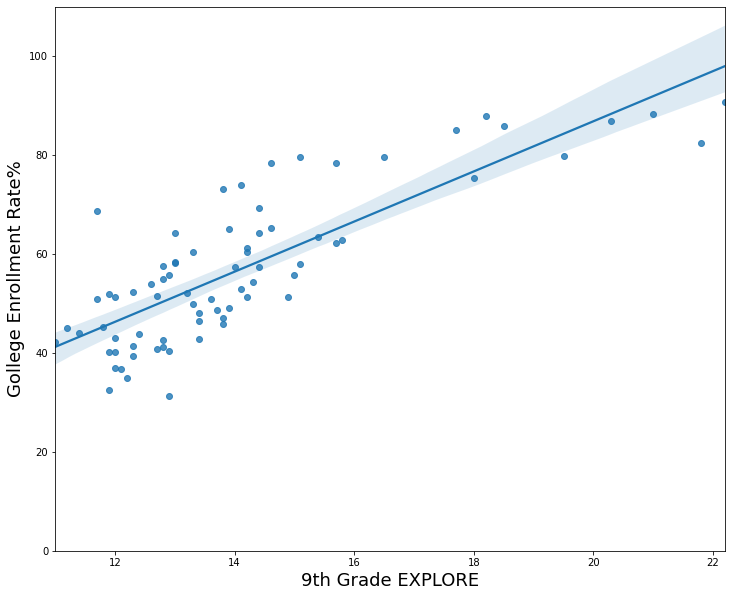

In [15]:
# Create a regression plot of 9th grade EXPLORE and college enrollment rate

import seaborn as sns

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="9th Grade EXPLORE (2010) ", y="College Enrollment Rate %", data=df2)
plt.ylim(0,)
plt.xlabel('9th Grade EXPLORE', fontsize=18)
plt.ylabel('Gollege Enrollment Rate%', fontsize=18)

Text(0, 0.5, 'Gollege Enrollment Rate%')

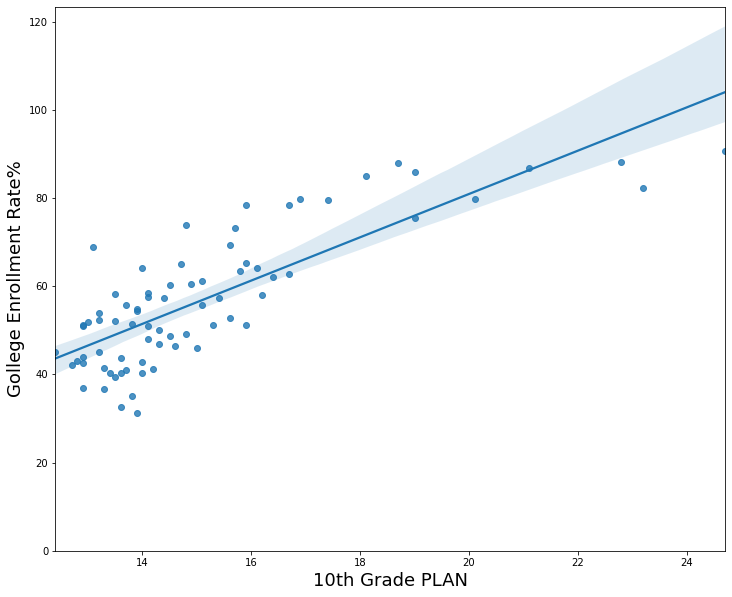

In [16]:
# Create a regression plot of 10th grade PLAN and college enrollment rate

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="10th Grade PLAN (2010) ", y="College Enrollment Rate %", data=df2)
plt.ylim(0,)
plt.xlabel('10th Grade PLAN', fontsize=18)
plt.ylabel('Gollege Enrollment Rate%', fontsize=18)



Text(0, 0.5, 'Gollege Enrollment Rate%')

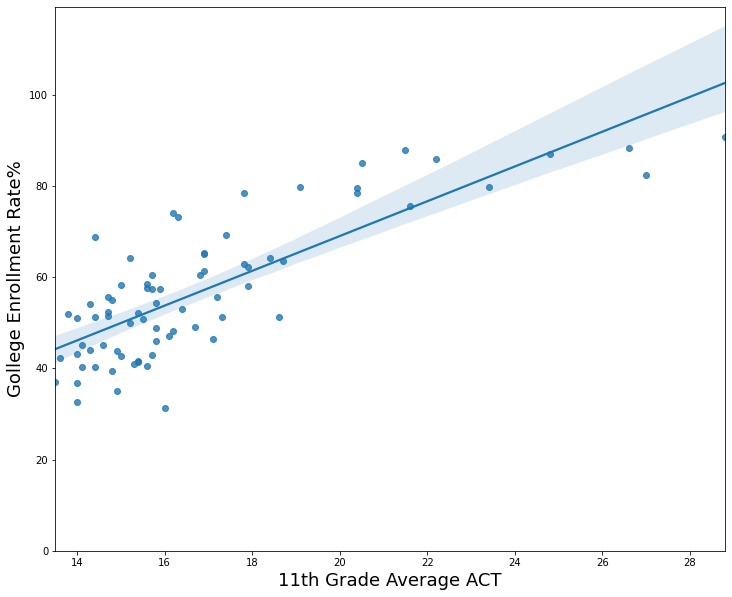

In [17]:
# Create a regression plot of 11th grade average ACT and college enrollment rate

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="11th Grade Average ACT (2011) ", y="College Enrollment Rate %", data=df2)
plt.ylim(0, )
plt.xlabel('11th Grade Average ACT', fontsize=18)
plt.ylabel('Gollege Enrollment Rate%', fontsize=18)

In general, all the academic scores have a positive relationship with college enrollment rate %. 

## K-Means Clustering

In [18]:
# Conduct K-means clustering to group the high schools into 4 groups, based on variables on df2 
# (9th Grade EXPLORE, 10th Grade PLAN, 11th Grade Average ACT, College Eligibility, Graduation Rate %, College Enrollment Rate %)


from sklearn.preprocessing import StandardScaler

# Noralize the dataset

X3 = df2.values
cluster_dataset = StandardScaler().fit_transform(X3)

In [19]:
from sklearn.cluster import KMeans 

num_clusters = 4

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[1 0 1 0 0 3 3 0 2 0 0 0 2 3 0 2 0 3 3 3 0 0 0 2 0 0 1 0 2 0 2 0 3 2 2 0 3
 2 0 2 2 2 0 0 3 0 2 3 2 0 0 2 1 3 3 1 0 2 0 2 0 0 0 0 2 3 0 2 0 0 0 3 0 2
 0]


In [20]:
# Add a column "Labels" to df that represents the high schools' group numbers. 

df["Labels"] = labels # Add the colum to df (not df2) since it has high school names--> will be used to generate maps later
df.head()

,Name of School,9th Grade EXPLORE (2010),10th Grade PLAN (2010),11th Grade Average ACT (2011),College Eligibility %,Graduation Rate %,College Enrollment Rate %,Latitude,Longitude,Labels
0,Walter Payton College Preparatory High School,21.8,23.2,27,96.4,96.9,82.4,41.901552,-87.634537,1
1,Manley Career Academy High School,11.9,13,13.8,6.7,49,51.9,41.870912,-87.699887,0
2,Northside College Preparatory High School,22.2,24.7,28.8,98,97.6,90.7,41.981352,-87.708672,1
3,Michele Clark Academic Prep Magnet High School,13.3,14.5,15.7,13,87.4,60.4,41.872857,-87.753355,0
4,Uplift Community High School,13.9,14.7,16.9,19.6,62.4,65,41.965574,-87.652522,0


In [21]:
# Add a column "Labels" to df that represents the high schools' group numbers.

df2["Labels"] = labels  # Add the colum to df2 (the one that do not have high school names) for statistical analysis

df2.head()



,9th Grade EXPLORE (2010),10th Grade PLAN (2010),11th Grade Average ACT (2011),College Eligibility %,Graduation Rate %,College Enrollment Rate %,Latitude,Longitude,Labels
0,21.8,23.2,27.0,96.4,96.9,82.4,41.901552,-87.634537,1
1,11.9,13.0,13.8,6.7,49.0,51.9,41.870912,-87.699887,0
2,22.2,24.7,28.8,98.0,97.6,90.7,41.981352,-87.708672,1
3,13.3,14.5,15.7,13.0,87.4,60.4,41.872857,-87.753355,0
4,13.9,14.7,16.9,19.6,62.4,65.0,41.965574,-87.652522,0


In [22]:
# Check how many high schools are divided into each group

df2.groupby('Labels').count()



,9th Grade EXPLORE (2010),10th Grade PLAN (2010),11th Grade Average ACT (2011),College Eligibility %,Graduation Rate %,College Enrollment Rate %,Latitude,Longitude
Labels,,,,,,,,
0,36,36,36,36,36,36,36,36
1,5,5,5,5,5,5,5,5
2,20,20,20,20,20,20,20,20
3,14,14,14,14,14,14,14,14


## Descriptive Analysis of Four Groups

In [23]:
# Descriptive analysis of 4 groups

df_means = df2.groupby('Labels').mean().round(2)
df_means

,9th Grade EXPLORE (2010),10th Grade PLAN (2010),11th Grade Average ACT (2011),College Eligibility %,Graduation Rate %,College Enrollment Rate %,Latitude,Longitude
Labels,,,,,,,,
0,13.53,14.46,16.09,17.72,60.88,50.84,41.89,-87.72
1,20.96,22.38,26.12,86.92,94.14,85.62,41.92,-87.67
2,12.22,13.30,14.43,8.68,48.28,47.95,41.77,-87.62
3,15.80,16.81,18.92,31.29,78.33,75.41,41.80,-87.65


In [24]:
df_means.columns

Index(['9th Grade EXPLORE (2010) ', '10th Grade PLAN (2010) ',
       '11th Grade Average ACT (2011) ', 'College Eligibility %',
       'Graduation Rate %', 'College Enrollment Rate %', 'Latitude',
       'Longitude'],
      dtype='object')

Seems like Group 0 has the lowest scores/values in all columns.

## Bar Chart of Academic and College-related Achievements of Four Groups

In [25]:
# Create a df that shows academic achievements to create a bar chart

df_grades=df_means[['9th Grade EXPLORE (2010) ', '10th Grade PLAN (2010) ', '11th Grade Average ACT (2011) ']]

df_grades

,9th Grade EXPLORE (2010),10th Grade PLAN (2010),11th Grade Average ACT (2011)
Labels,,,
0,13.53,14.46,16.09
1,20.96,22.38,26.12
2,12.22,13.30,14.43
3,15.80,16.81,18.92


In [26]:
df_grades = df_grades.transpose()

df_grades

Labels,0,1,2,3
9th Grade EXPLORE (2010),13.53,20.96,12.22,15.80
10th Grade PLAN (2010),14.46,22.38,13.30,16.81
11th Grade Average ACT (2011),16.09,26.12,14.43,18.92


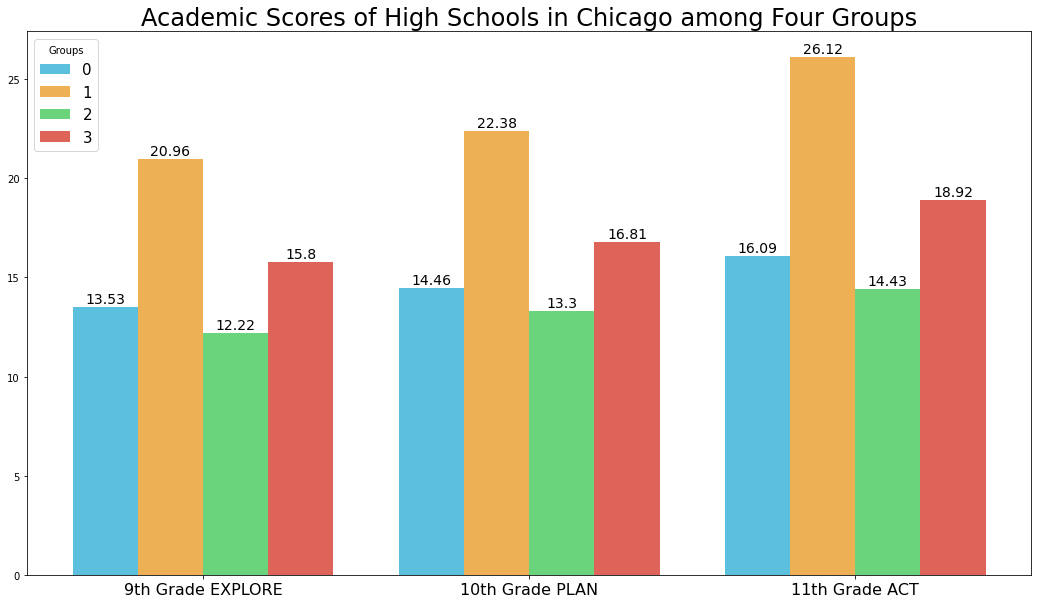

In [27]:
labels = ['9th Grade EXPLORE', '10th Grade PLAN', '11th Grade ACT']
height1=df_grades[0]
height2=df_grades[1]
height3=df_grades[2]
height4=df_grades[3]

x = np.arange(len(labels))


fig, ax = plt.subplots(figsize=(18,10))
rects1 = ax.bar(x-0.3, height1, width=0.2, label='0', color='#5bc0de')
rects2 = ax.bar(x-0.1, height2, width=0.2, label='1', color='#edb055')
rects3 = ax.bar(x+0.1, height3, width=0.2, label='2', color='#6ad47c')
rects4 = ax.bar(x+0.3, height4, width=0.2, label='3', color='#de6459')


ax.set_title("Academic Scores of High Schools in Chicago among Four Groups", fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, fontsize=16)
ax.legend(title='Groups', fontsize=15, loc='upper left')  # Set the title, fontsize, and location of the legend

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1), 
                    textcoords="offset points",
                    fontsize=14, 
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


plt.show()

The bar chart shows that Group 2 (Green) has the lowest scores in all variables. Group 1 (Orange) has the highes scores. 

In [28]:
# Create a df that shows college-related achievements to create a bar chart 

df_college=df_means[['College Eligibility %', 'Graduation Rate %', 'College Enrollment Rate %']]

df_college

,College Eligibility %,Graduation Rate %,College Enrollment Rate %
Labels,,,
0,17.72,60.88,50.84
1,86.92,94.14,85.62
2,8.68,48.28,47.95
3,31.29,78.33,75.41


In [29]:
df_college=df_college.transpose()

df_college

Labels,0,1,2,3
College Eligibility %,17.72,86.92,8.68,31.29
Graduation Rate %,60.88,94.14,48.28,78.33
College Enrollment Rate %,50.84,85.62,47.95,75.41


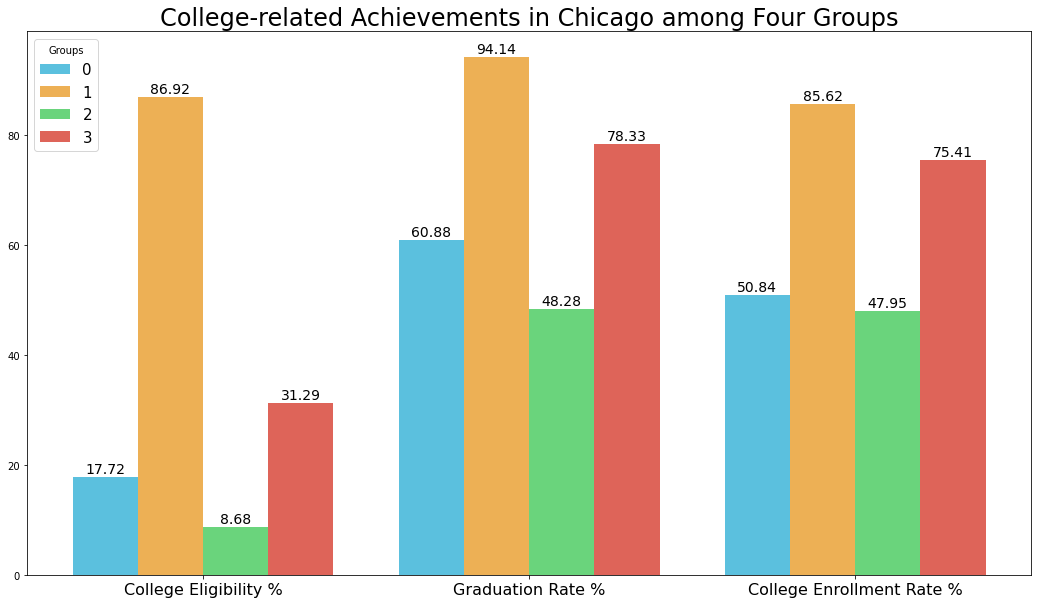

In [30]:
labels = ['College Eligibility %', 'Graduation Rate %', 'College Enrollment Rate %']
height1=df_college[0]
height2=df_college[1]
height3=df_college[2]
height4=df_college[3]

x = np.arange(len(labels))


fig, ax = plt.subplots(figsize=(18,10))
rects1 = ax.bar(x-0.3, height1, width=0.2, label='0', color='#5bc0de')
rects2 = ax.bar(x-0.1, height2, width=0.2, label='1', color='#edb055')
rects3 = ax.bar(x+0.1, height3, width=0.2, label='2', color='#6ad47c')
rects4 = ax.bar(x+0.3, height4, width=0.2, label='3', color='#de6459')


ax.set_title("College-related Achievements in Chicago among Four Groups", fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, fontsize=16)
ax.legend(title='Groups', fontsize=15, loc='upper left')  # Set the title, fontsize, and location of the legend


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1), 
                    textcoords="offset points",
                    fontsize=14, 
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


plt.show()

Again, the bar chart shows that Group 2 (Green) has the lowest scores in all variables. Group 1 (Orange) has the highes scores. 

## Maps

In [31]:
# Create a map that shows locations of high schools in Group 0 (High schools that have the lowest academic/college-related scores)

! pip install folium==0.5.0

import folium

In [35]:
# Create dfs for Group 1(highest scores) and Group 2 (lowest scores)

df_g1=df[df['Labels']==1]

df_g2=df[df['Labels']==2]

In [50]:
latitude = 41.8781
longitude = -87.6298

map_chicago=folium.Map(location=[latitude, longitude], zoom_start=12)


    
# Plot Group 1 on the map

for lat, lng, name in zip(df_g1['Latitude'], df_g1['Longitude'], df_g1['Name of School']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#e68415',
        fill_opacity=0.9
        ).add_to(map_chicago)  
    

    

# Plot Group 2 on the map

for lat, lng, name in zip(df_g2['Latitude'], df_g2['Longitude'], df_g2['Name of School']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#0d8c35',
        fill_opacity=0.7
        ).add_to(map_chicago)  
    
map_chicago



In [51]:
# Add legend 

from folium.plugins import FloatImage
image_file = 'Legend.JPG'

FloatImage(image_file, bottom=85, left=80).add_to(map_chicago)

map_chicago

Image of the map

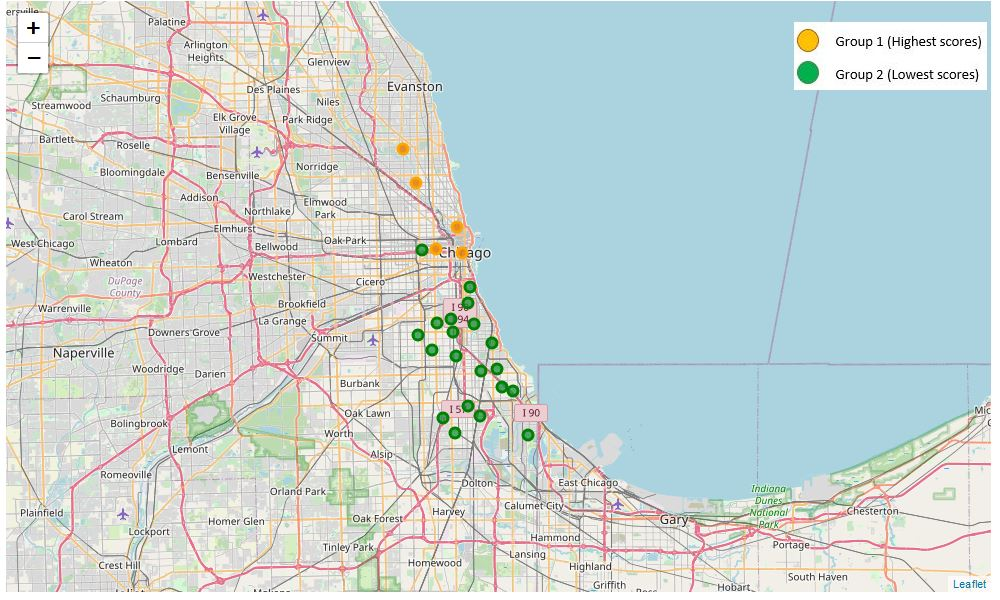

High schools with the lowest scores tend to be located in the southern region, and the ones with the highest scores are located in the northern region. 